In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from sklearn import svm

In [2]:

np.random.seed(0)
X = np.r_[np.random.randn(20, 2)-[2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
X[:3],Y[:3]

(array([[-0.23594765, -1.59984279],
        [-1.02126202,  0.2408932 ],
        [-0.13244201, -2.97727788]]),
 [0, 0, 0])

In [3]:

clf = svm.SVC(kernel="linear")
clf.fit(X, Y)

SVC(kernel='linear')

In [4]:
# Get the separating hyperplane


w = clf.coef_[0]  

# Slope of the model
a = -w[0] / w[1]  

#  X coordinate
xx = np.linspace(-5, 5) 

#  Y coordinate
yy = a * xx - (clf.intercept_[0]) / w[1] 

xx,yy

(array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
         0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
         1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
         2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
         3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
         4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ]),
 array([ 7.32169617,  7.03761852,  6.75354087,  6.46946322,  6.18538558,
         5.90130793,  5.61723028,  5.33315263,  5.04907498,  4.76499733,
         4.48091969,  4.19684204,  3.91276439,  3.62868674,  3.34460909,
         3.06053144,  2.7764538 ,  2.49237615,  2

In [5]:
#  upper plane
b = clf.support_vectors_[0]    
yy_down = a * xx + (b[1] - a * b[0]) 
yy_down

array([ 5.77921879,  5.49514114,  5.2110635 ,  4.92698585,  4.6429082 ,
        4.35883055,  4.0747529 ,  3.79067526,  3.50659761,  3.22251996,
        2.93844231,  2.65436466,  2.37028701,  2.08620937,  1.80213172,
        1.51805407,  1.23397642,  0.94989877,  0.66582113,  0.38174348,
        0.09766583, -0.18641182, -0.47048947, -0.75456712, -1.03864476,
       -1.32272241, -1.60680006, -1.89087771, -2.17495536, -2.45903301,
       -2.74311065, -3.0271883 , -3.31126595, -3.5953436 , -3.87942125,
       -4.16349889, -4.44757654, -4.73165419, -5.01573184, -5.29980949,
       -5.58388714, -5.86796478, -6.15204243, -6.43612008, -6.72019773,
       -7.00427538, -7.28835302, -7.57243067, -7.85650832, -8.14058597])

In [6]:
#  lower plane
b = clf.support_vectors_[-1]  
yy_up = a * xx + (b[1] - a * b[0])
yy_up

array([ 8.86428014,  8.58020249,  8.29612484,  8.0120472 ,  7.72796955,
        7.4438919 ,  7.15981425,  6.8757366 ,  6.59165896,  6.30758131,
        6.02350366,  5.73942601,  5.45534836,  5.17127071,  4.88719307,
        4.60311542,  4.31903777,  4.03496012,  3.75088247,  3.46680482,
        3.18272718,  2.89864953,  2.61457188,  2.33049423,  2.04641658,
        1.76233894,  1.47826129,  1.19418364,  0.91010599,  0.62602834,
        0.34195069,  0.05787305, -0.2262046 , -0.51028225, -0.7943599 ,
       -1.07843755, -1.36251519, -1.64659284, -1.93067049, -2.21474814,
       -2.49882579, -2.78290344, -3.06698108, -3.35105873, -3.63513638,
       -3.91921403, -4.20329168, -4.48736933, -4.77144697, -5.05552462])

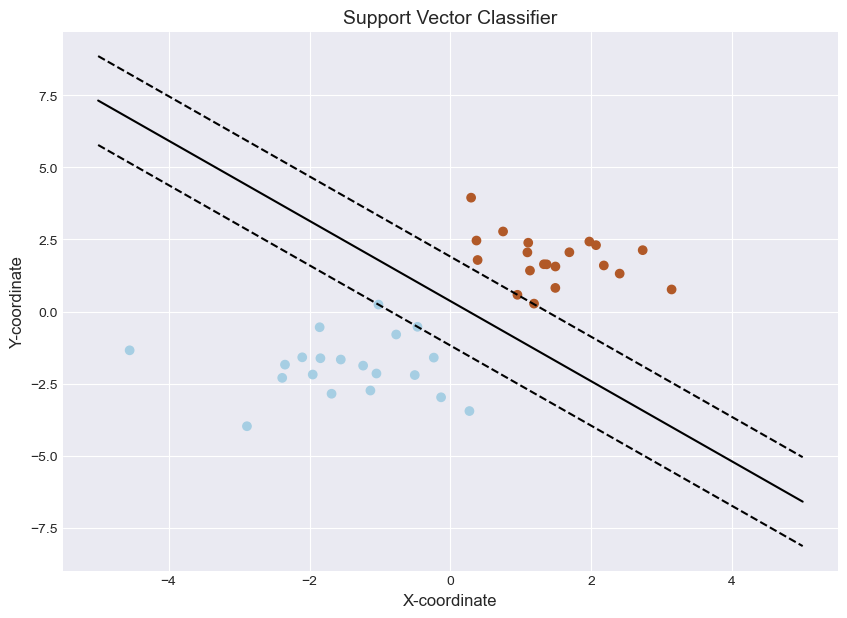

In [7]:
plt.figure(figsize=(10,7))

# Separating hyperplane
plt.plot(xx, yy,'k-')        
# Lower boundary
plt.plot(xx, yy_down, 'k--') 
# Upper boundary
plt.plot(xx, yy_up,'k--')   
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors="none") 
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Support Vector Classifier', fontsize=14)
plt.xlabel('X-coordinate', fontsize=12)
plt.ylabel('Y-coordinate', fontsize=12)
plt.show()